<a href="https://colab.research.google.com/github/yudhiesh1997/Optimisation-Deep-Learning/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [77]:
X = np.arange(1000).reshape(-1,1)
y = np.random.randint(2, size=1000).reshape(-1,1)

print(f'X shape {X.shape}\ny shape {y.shape}')

X shape (1000, 1)
y shape (1000, 1)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X train shape {X_train.shape}\nX test shape {X_test.shape}\ny test \n{y_test}\n{X_train}')

X train shape (800, 1)
X test shape (200, 1)
y test 
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [

In [79]:
log = LogisticRegression(solver='lbfgs', random_state=42)
log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
print(f'Intercept: {log.intercept_}\nSlope: {log.coef_}')
print(f'Model classes: {log.classes_}')

Intercept: [-8.02725607e-08]
Slope: [[0.00013215]]
Model classes: [0 1]


In [81]:
y_pred = log.predict(X_test)

In [82]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [83]:
log.predict_proba(X_test)

array([[0.48279404, 0.51720596],
       [0.47567027, 0.52432973],
       [0.47557139, 0.52442861],
       [0.47820877, 0.52179123],
       [0.48642475, 0.51357525],
       [0.47761525, 0.52238475],
       [0.47933004, 0.52066996],
       [0.48305803, 0.51694197],
       [0.47165084, 0.52834916],
       [0.49550698, 0.50449302],
       [0.47323185, 0.52676815],
       [0.49748916, 0.50251084],
       [0.47900023, 0.52099977],
       [0.4678983 , 0.5321017 ],
       [0.46905003, 0.53094997],
       [0.47033377, 0.52966623],
       [0.49075044, 0.50924956],
       [0.47086055, 0.52913945],
       [0.4748793 , 0.5251207 ],
       [0.48946247, 0.51053753],
       [0.48187013, 0.51812987],
       [0.49425167, 0.50574833],
       [0.48774539, 0.51225461],
       [0.48259605, 0.51740395],
       [0.49306249, 0.50693751],
       [0.49223672, 0.50776328],
       [0.49666323, 0.50333677],
       [0.4674706 , 0.5325294 ],
       [0.47023501, 0.52976499],
       [0.46875384, 0.53124616],
       [0.

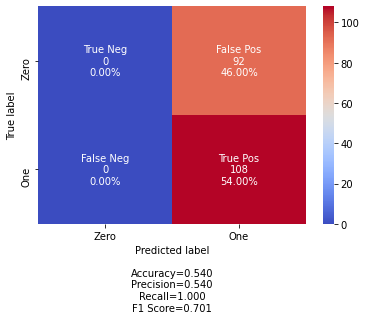

In [84]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm')

In [85]:
# R^2 score 
print(f'Model score: {log.score(X_test, y_test)}')

Model score: 0.54


In [86]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.54      1.00      0.70       108

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# Improve the model 

log3 = LogisticRegression(solver="liblinear", C=10.0, random_state=42)
log3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
print(f'Intercept of improved model: {log3.intercept_}\nSlope: {log3.coef_}')
print(f'Model classes: {log3.classes_}')

Intercept of improved model: [-0.12122923]
Slope: [[0.00031438]]
Model classes: [0 1]


In [89]:
y_pred2 = log3.predict(X_test)

In [90]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)
cf_matrix2

array([[35, 57],
       [46, 62]])

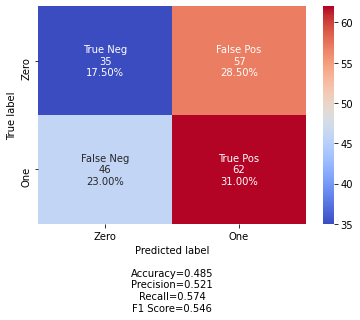

In [91]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm')

In [92]:
# R^2 score 
print(f'Model score: {log3.score(X_test, y_test)}')

Model score: 0.485


In [93]:
print(classification_report(y_test, log3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        92
           1       0.52      0.57      0.55       108

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



In [94]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", max_iter=1000, alpha =0.001, random_state=42)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)

print(f'Coefficients : {clf.coef_}\nY_intercept : {clf.intercept_}\nScore : {clf.score(X_test, y_test)}')

Coefficients : [[1.14323475]]
Y_intercept : [-69.27876446]
Score : 0.54


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
cf_matrix2 = confusion_matrix(y_test, y_pred_sgd)
cf_matrix2

array([[  5,  87],
       [  5, 103]])

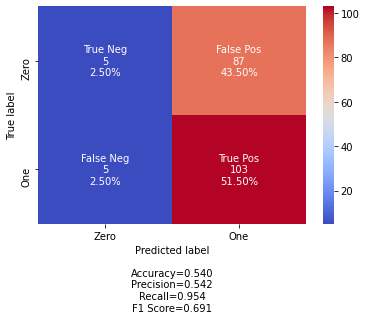

In [96]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm')

In [76]:
clf.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)>